## Lista 05 - Estimação Pontual e Intervalo de Confiança

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate, special, stats
import seaborn as sns

## Prova 5

#### Questão 1

In [ ]:
## ERRADO: deveria ser normal ao inves de distribuicao t

p = 0.45
mu = p
n = 70
s = np.sqrt(n-1)/np.sqrt(n-3)

limLow = (0.33 - p) * np.sqrt(n) / s
limSup = (0.55 - p) * np.sqrt(n) / s

qLow = stats.t.cdf(limLow, n-1)
qSup = stats.t.cdf(limSup, n-1)

p = qSup - qLow
print(p)

0.6307581175867847


#### Questão 2

In [ ]:
df = pd.read_csv('/P5_Questao2.csv')
df.head()

,x
0,3.26
1,3.27
2,3.23
3,3.11
4,7.64


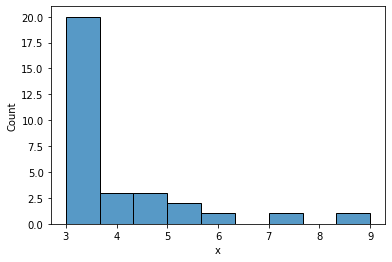

In [ ]:
sns.histplot(data=df, x='x')
plt.show()

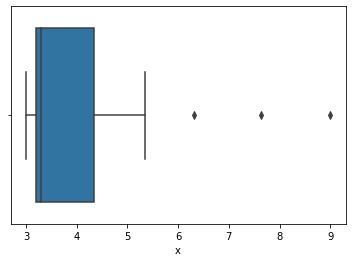

In [ ]:
sns.boxplot(data=df, x='x')
plt.show()

In [ ]:
p1 = df['x'].quantile(0.25)
p2 = df['x'].quantile(0.75)
print(p1, p2)

3.205 4.345000000000001


In [ ]:
pm = df['x'].quantile(0.5)
print(pm)

3.3


#### Questão 3

In [ ]:
s = 0.42
n = 20
m = 70.05
a = 0.95
a2 = (1 - a)/2
print(a2)

z = stats.norm.ppf(a2)
E = z * (s / np.sqrt(n))

IC = [m - E, m + E]
print(IC)

0.025000000000000022
[70.23406973352108, 69.86593026647891]


#### Questão 4

In [ ]:
n = 660
f = 0.74 # Estimativa para p

s = np.sqrt(f*(1-f))

b = 0.95
a = (1 - b) / 2

z = stats.norm.ppf(a)
E = z*s/np.sqrt(n)
IC = [f-E, f+E]
print(IC)

[0.7734640620689399, 0.7065359379310601]


In [ ]:
n = 660
f = 0.74 # Estimativa para p

# Otimista para binomial
mu_s = f
s2 = f * (1 - f) / n

b = 0.95
a = (1 - b) / 2

q = stats.norm.ppf(a)

IC = [f-q*np.sqrt(s2), f+q*np.sqrt(s2),]

print(IC)

[0.7734640620689399, 0.7065359379310601]


#### Questão 5

In [ ]:
X = [4.7, 3, 4.1, 2.3, 3.1, 3.5, 3.1, 3.1, 2, 2.3]
mu = np.mean(X)
n = len(X)

b = 0.95
a = (1 - b) / 2

z = stats.t.ppf(a, n-1)
s2 = np.var(X) * (n/(n-1))
E = z * np.sqrt(s2) / np.sqrt(n)

IC = [mu-E, mu+E]
print(IC)

[3.7145070680814616, 2.5254929319185386]


In [ ]:
X = [4.7, 3, 4.1, 2.3, 3.1, 3.5, 3.1, 3.1, 2, 2.3]
mu = np.mean(X)
n = len(X)
print(n)

b = 0.95
a = (1 - b) / 2

z = stats.t.ppf(a, n-1)
s2 = np.var(X) * (n/(n-1))
E = z * np.sqrt(s2) / np.sqrt(n)

IC = [mu-E, mu+E]
print(IC)

10
[3.7145070680814616, 2.5254929319185386]


## Simulado 05

#### Questão 1

In [ ]:
df = pd.read_csv('Simulado Q1.csv')
df.head()

,x
0,0.193460
1,0.850971
2,0.409289
3,-0.945363
4,0.517830


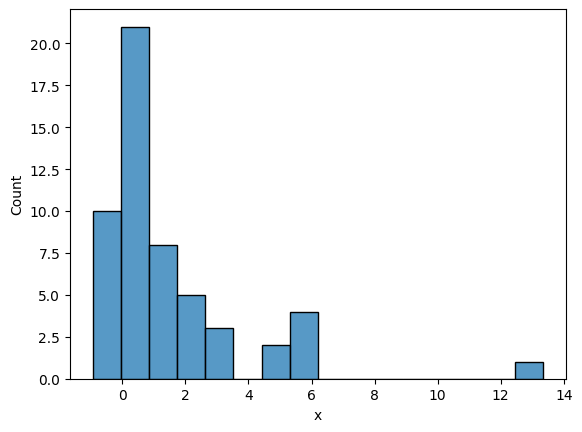

In [ ]:
sns.histplot(data=df, x='x')
plt.show()

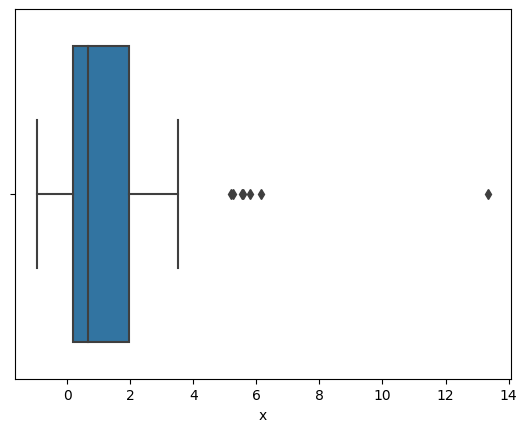

In [ ]:
sns.boxplot(data=df, x='x')
plt.show()

In [ ]:
p1 = df['x'].quantile(0.25)
p2 = df['x'].quantile(0.75)
print(p2-p1)

1.7810120887164722


In [ ]:
m = np.mean(df['x'])
print(m)

1.5177255636393752


#### Questão 2

Máxima Verossimilhança, $\overline{X} = mean(X) = sum(x_i)/N$

$$
\theta e^{\theta x}: \theta_s = 1/\overline{X}
$$

$$
Poisson(\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}: \lambda_s = \overline{X}
$$

$$
N(\mu, \sigma^2): \mu_s = \overline{X}
$$

$$
Binomial(n,p): p_s = \overline{X}
$$

Estimador geral não enviesado:

$$
\sigma^2_s = \frac{n}{n-1} (E[X^2] - E[\overline{X}^2]) = \frac{n}{n-1} \sigma^2_{amostral}
$$

In [ ]:
X = [14,4,8,10,15,15,11,18,6,14,8,11,10,14,12]
l = np.mean(X)
print(l)

11.333333333333334


In [ ]:
n = 15
""" 
  Para intervalo de 90% de confiança

  1-a = 0.90  => a = 0.10  => a/2 = 0.05

  Seja f a função desejada de aproximação ou da propria distribuição
  z_{a/2} = percentPoint(f, -inf, a/2) = cumSum^{-1}(f, -inf, a/2)

  otimista
  E = z_{a/2} sigma / sqrt{n}

  conservativa
  E = z_{a/2} 1 / (2 sqrt{n})
"""

q = stats.t.ppf(0.05, n-1)
s2 = np.var(X) * (n/(n-1))
E = q * np.sqrt(s2) / np.sqrt(n)
IC = [l-E, l+E]
print(IC)

[13.057916048082578, 9.60875061858409]


#### Questão 3

In [ ]:
n = 72
l = 5
s2 = l**2

shiftLimit = (371 - n * l) / (np.sqrt(n * s2))

p = 1 - stats.norm.cdf(shiftLimit)
print(p)

0.3977125031952966


#### Questão 4

In [ ]:
n = 107
boas = 91
m = boas/n

q = 1 / np.sqrt(4 * n)
za = stats.norm.ppf(0.01)
E = za * q

IC = [m-E, m+E]
print(IC)

[0.9629155585220804, 0.7380190209171719]


#### Questão 5

In [ ]:
l = 10
p = 1 - stats.expon.cdf(l, scale=l)
print(p ** 3)

0.04978706836786395


### Questão 6

In [ ]:
s = 2500
n = 22
m = 57812
a = 0.94
a2 = (1 - a)/2

z = stats.norm.ppf(a2)
E = z * (s / np.sqrt(n))

IC = [m - E, m + E]
print(IC)


[58814.46636143725, 56809.53363856275]


## Lista 05

#### Questão 5

In [ ]:
a = stats.norm.cdf(-2) + (1 - stats.norm.cdf(2))
print(a)

0.0455002638963584


#### Questão 6

In [ ]:
n = 5
limSup = 2 * (n-1)
limLow = (n-1) / 2

qLow = stats.chi2.cdf(limLow, n)
qSup = stats.chi2.cdf(limSup, n)

print(qLow, qSup)
p = qSup - qLow
print(p)


0.15085496391539038 0.8437643724222779
0.6929094085068874


In [ ]:
# Aproximacao n 'grande' para normal partindo de Chi2
# mu = n, s^2 = 2n

n = 20
limSup = 2 * (n-1)
limLow = (n-1) / 2

qLow = stats.chi2.cdf(limLow, n)
qSup = stats.chi2.cdf(limSup, n)

print("CHI2")
print(qLow, qSup)
p = qSup - qLow
print(p)

s = np.sqrt(2*n)
qLow = stats.norm.cdf(limLow, loc=n, scale=s)
qSup = stats.norm.cdf(limSup, loc=n, scale=s)

print("NORM")
print(qLow, qSup)
p = qSup - qLow
print(p)


CHI2
0.02364069482096414 0.9911444161438748
0.9675037213229107
NORM
0.0484375375131373 0.99778673707104
0.9493491995579028


#### QUestão 7

In [ ]:
n = 10

limLow = -0.1 * np.sqrt(n)
limSup = 0.1 * np.sqrt(n)

qLow = stats.t.cdf(limLow, n-1)
qSup = stats.t.cdf(limSup, n-1)

p = qSup - qLow
print(p)

0.24095934553585607


In [ ]:
# Aproximacao para n 'grande' partindo de t de Student
# mu = 0, s^2 = k/(k-1) = (n-1)/(n-3)

n = 100

s = np.sqrt((n-1)/(n-3))
qLow = stats.norm.cdf(limLow, loc=0, scale=s)
qSup = stats.norm.cdf(limSup, loc=0, scale=s)

#create 95% confidence interval for population mean weight
# stats.norm.interval(alpha=0.95, loc=0, scale=s)


p = qSup - qLow
print(qSup, qLow)

0.6228662211893632 0.37713377881063676


#### Questão 8

In [ ]:
n = 1000
f = 0.5 # Estimativa para p

# Otimista para binomial
mu_s = f
s2 = f * (1 - f) / n

b = 0.95
a = (1 - b) / 2

q = stats.norm.ppf(a)

IC = [f-q*np.sqrt(s2), f+q*np.sqrt(s2),]

print(IC)


[0.5309897516152281, 0.4690102483847719]


#### Questão 9

In [ ]:
mu = 78.47
s = 13.61

a = 1 - stats.norm.cdf(81.65, loc=mu, scale=s)
print(a)

n = 36
shift = (81.65 - mu) / (s/np.sqrt(n))
b = 1 - stats.norm.cdf(shift)

print(b)

0.4076276834679827
0.08047100819967401


#### Questão 10

In [ ]:
n = 100
mu = 170
s = 15
a = 0.05

z = stats.norm.ppf(a/2)
IC = [mu - z*s/np.sqrt(n), mu + z*s/np.sqrt(n)]
print(IC)

[172.9399459768101, 167.0600540231899]


#### Questão 11

In [ ]:
xb = np.mean([2.9, 3.4, 3.5, 4.1, 4.6, 4.7, 4.5, 3.8, 5.3, 4.9, 4.8, 5.7, 5.8, 5.0, 3.4, 5.9, 6.3, 4.6, 5.5, 6.2])
print(xb)

n = 20
s = 2
a = 1-0.96
z = stats.norm.ppf(a/2)
IC = [xb - z * (s / np.sqrt(n)), xb + z * (s / np.sqrt(n))]
print(IC)


4.745
[5.663464434577779, 3.826535565422221]
